# Examples

Some examples of how to use the anomaly agent.

<a target="_blank" href="https://colab.research.google.com/github/andrewm4894/anomaly-agent/blob/main/notebooks/examples.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [5]:
import os
import pandas as pd
from anomaly_agent.utils import make_df, make_anomaly_config
from anomaly_agent.plot import plot_df_matplotlib as plot_df
from anomaly_agent.agent import AnomalyAgent

pd.set_option('display.max_colwidth', None)

# set openai api key if not in environment
# os.environ['OPENAI_API_KEY'] = "<your-openai-api-key>"

In [6]:
# get and anomaly config to generate some dummy data
anomaly_cfg = make_anomaly_config()
print(anomaly_cfg)

# generate some dummy data
df = make_df(500, 3, anomaly_config=anomaly_cfg)
df.head()


{'enabled': True, 'fraction': 0.05, 'methods': ['spike', 'drop', 'shift', 'noise'], 'spike_factor': 10, 'shift_value': 3, 'noise_std': 0.2}


,timestamp,var1,var2,var3
0,2020-01-01,0.587940,0.381979,0.673331
1,2020-01-02,0.129431,0.600018,0.677183
2,2020-01-03,0.418075,0.279563,0.864784
3,2020-01-04,0.925650,0.585627,0.304488
4,2020-01-05,0.339977,0.796052,0.965243


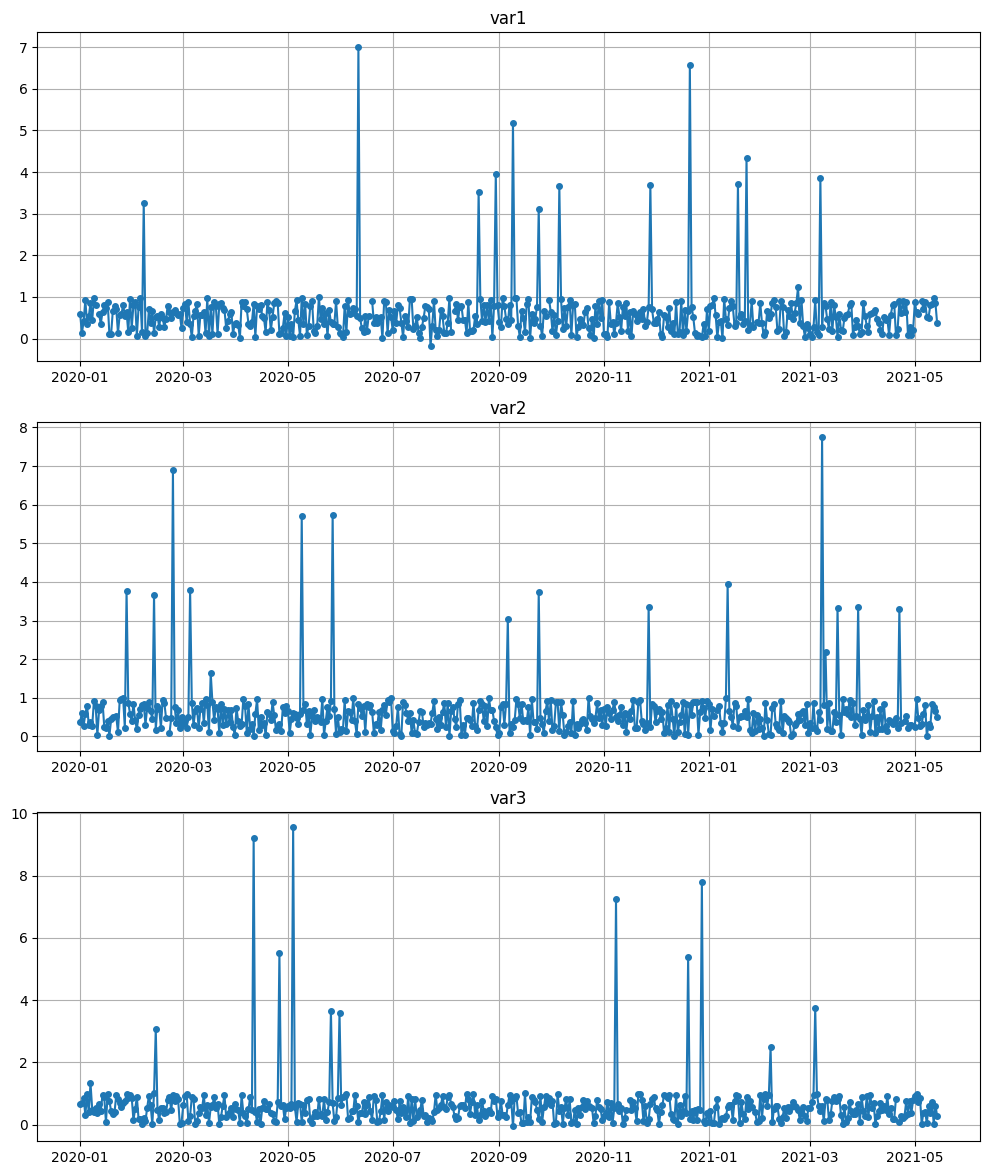

In [7]:
# plot the data
plot_df(df)

In [8]:
# create anomaly agent
anomaly_agent = AnomalyAgent()

# detect anomalies
anomalies = anomaly_agent.detect_anomalies(df)

# detect anomalies without verification
anomalies_no_verify = anomaly_agent.detect_anomalies(df, verify=False)

# print anomalies
print(anomalies)


{'var1': AnomalyList(anomalies=[Anomaly(timestamp='2020-01-11', variable_value=0.0, anomaly_description='Missing value in time series'), Anomaly(timestamp='2020-02-07', variable_value=3.259387, anomaly_description='Value significantly higher than the previous and subsequent values'), Anomaly(timestamp='2020-06-11', variable_value=6.996268, anomaly_description='Value significantly higher than the previous and subsequent values'), Anomaly(timestamp='2020-07-23', variable_value=-0.186113, anomaly_description='Negative value in time series where values are generally positive'), Anomaly(timestamp='2020-08-20', variable_value=3.526075, anomaly_description='Value significantly higher than the previous and subsequent values'), Anomaly(timestamp='2020-08-30', variable_value=3.9613, anomaly_description='Value significantly higher than the previous and subsequent values'), Anomaly(timestamp='2020-09-09', variable_value=5.186514, anomaly_description='Value significantly higher than the previous an

In [9]:
# get anomalies in long format
df_anomalies_long = anomaly_agent.get_anomalies_df(anomalies)
df_anomalies_long.head()

,timestamp,variable_name,value,anomaly_description
0,2020-01-11,var1,0.000000,Missing value in time series
1,2020-02-07,var1,3.259387,Value significantly higher than the previous and subsequent values
2,2020-06-11,var1,6.996268,Value significantly higher than the previous and subsequent values
3,2020-07-23,var1,-0.186113,Negative value in time series where values are generally positive
4,2020-08-20,var1,3.526075,Value significantly higher than the previous and subsequent values


In [10]:
# get anomalies in wide format
df_anomalies_wide = anomaly_agent.get_anomalies_df(anomalies, format="wide")

df_anomalies_wide_no_verify = anomaly_agent.get_anomalies_df(anomalies_no_verify, format="wide")

df_anomalies_wide.head()


,timestamp,var1,var2,var3
0,2020-01-11,0.000000,NaN,NaN
1,2020-02-07,3.259387,NaN,NaN
2,2020-06-11,6.996268,NaN,NaN
3,2020-07-23,-0.186113,NaN,NaN
4,2020-08-20,3.526075,NaN,NaN


In [11]:
# merge anomalies with original data
df_final = df.merge(df_anomalies_wide, on="timestamp", how="left", suffixes=("", "_anomaly_flag"))

df_final_no_verify = df.merge(df_anomalies_wide_no_verify, on="timestamp", how="left", suffixes=("", "_anomaly_flag"))

df_final.head()


,timestamp,var1,var2,var3,var1_anomaly_flag,var2_anomaly_flag,var3_anomaly_flag
0,2020-01-01,0.587940,0.381979,0.673331,NaN,NaN,NaN
1,2020-01-02,0.129431,0.600018,0.677183,NaN,NaN,NaN
2,2020-01-03,0.418075,0.279563,0.864784,NaN,NaN,NaN
3,2020-01-04,0.925650,0.585627,0.304488,NaN,NaN,NaN
4,2020-01-05,0.339977,0.796052,0.965243,NaN,NaN,NaN


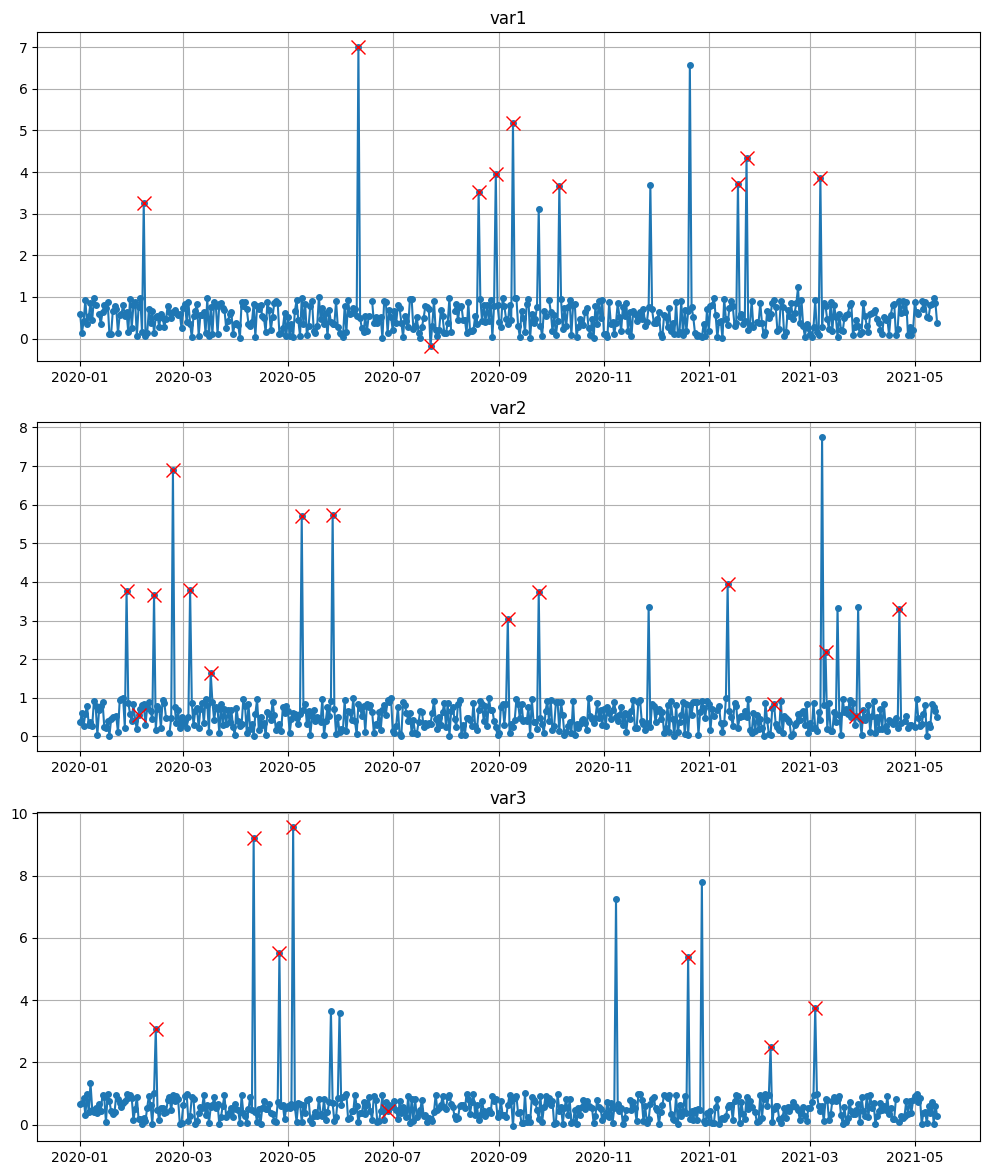

In [12]:
# plot final data with anomalies
plot_df(df_final)

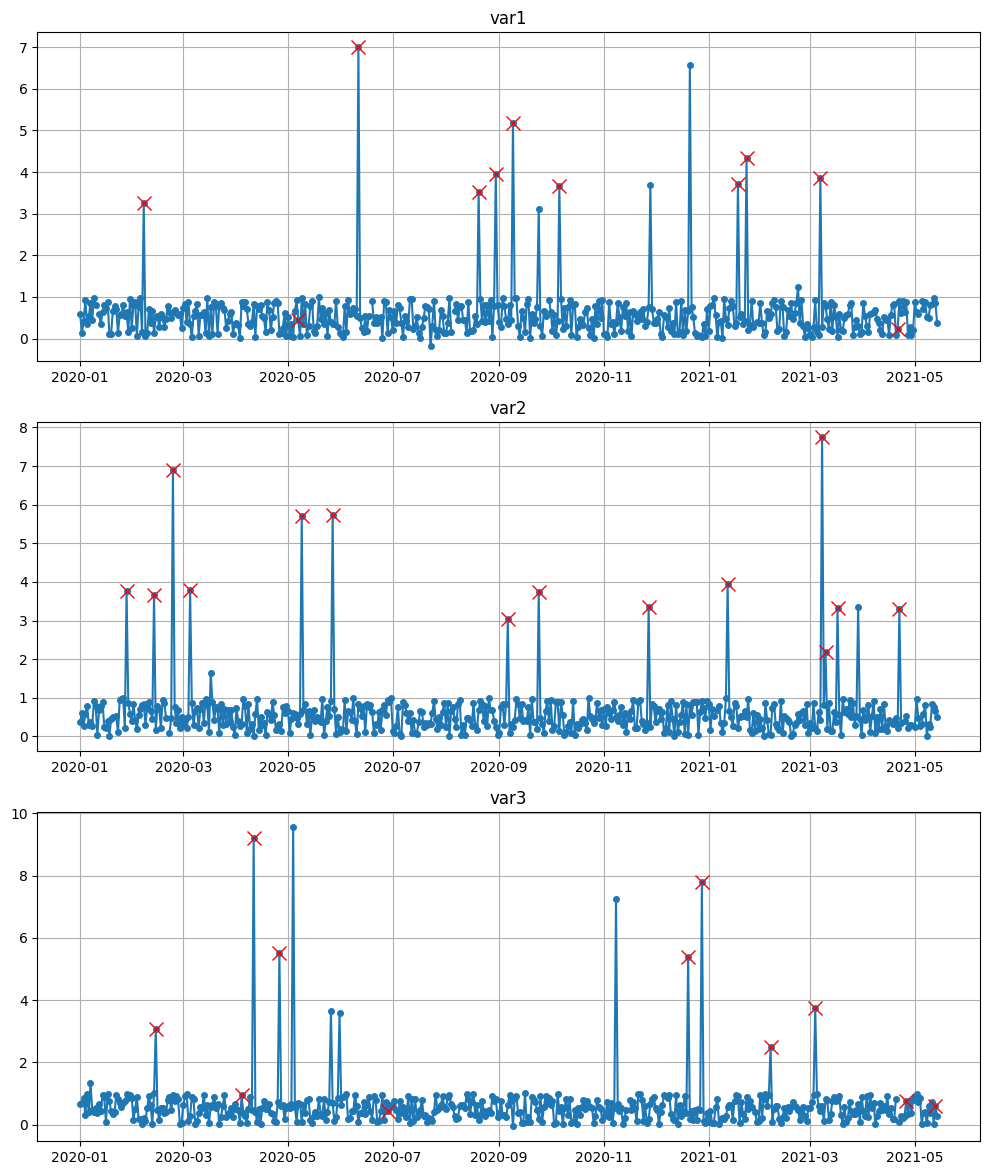

In [13]:
# plot final data no verify
plot_df(df_final_no_verify)